In [3]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [4]:
train_labels = []
train_samples = []

In [5]:
for i in range(50):
    # The ~5% of younger individuals who did experience side effects
    random_younger = randint(13, 64)
    train_samples.append(random_younger)
    train_labels.append(1)

    #The ~5% of older individuals who did not experience side effects
    random_older = randint(65, 100)
    train_samples.append(random_older)
    train_labels.append(0)

for i in range(1000):
    # The ~95% of younger individuals who did not experience side effects
    random_younger = randint(13, 64)
    train_samples.append(random_younger)
    train_labels.append(0)

    # The ~95% of older individuals who did experience side effects
    random_older = randint(65, 100)
    train_samples.append(random_older)
    train_labels.append(1)

In [6]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)
train_labels, train_samples = shuffle(train_labels, train_samples)

In [7]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))

In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy 

In [9]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

Num GPUs Available:  0


IndexError: list index out of range

In [10]:
model = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [13]:
model.fit(x=scaled_train_samples, y=train_labels, validation_split=0.1, batch_size=10, epochs=30, shuffle=True, verbose=2)

Epoch 1/30
189/189 - 1s - loss: 0.6642 - accuracy: 0.5418 - val_loss: 0.6613 - val_accuracy: 0.5333
Epoch 2/30
189/189 - 0s - loss: 0.6404 - accuracy: 0.6265 - val_loss: 0.6368 - val_accuracy: 0.6429
Epoch 3/30
189/189 - 0s - loss: 0.6135 - accuracy: 0.6899 - val_loss: 0.6108 - val_accuracy: 0.7048
Epoch 4/30
189/189 - 0s - loss: 0.5840 - accuracy: 0.7397 - val_loss: 0.5814 - val_accuracy: 0.7619
Epoch 5/30
189/189 - 0s - loss: 0.5530 - accuracy: 0.7757 - val_loss: 0.5510 - val_accuracy: 0.7714
Epoch 6/30
189/189 - 0s - loss: 0.5217 - accuracy: 0.8106 - val_loss: 0.5207 - val_accuracy: 0.7810
Epoch 7/30
189/189 - 0s - loss: 0.4906 - accuracy: 0.8413 - val_loss: 0.4913 - val_accuracy: 0.7952
Epoch 8/30
189/189 - 0s - loss: 0.4609 - accuracy: 0.8608 - val_loss: 0.4649 - val_accuracy: 0.8143
Epoch 9/30
189/189 - 0s - loss: 0.4337 - accuracy: 0.8735 - val_loss: 0.4387 - val_accuracy: 0.8381
Epoch 10/30
189/189 - 0s - loss: 0.4087 - accuracy: 0.8862 - val_loss: 0.4161 - val_accuracy: 0.8571

In [14]:
test_labels = []
test_samples = []

In [16]:
for i in range(10):
    # The ~5% of younger individuals who did experience side effects
    random_younger = randint(13, 64)
    test_samples.append(random_younger)
    test_labels.append(1)

    #The ~5% of older individuals who did not experience side effects
    random_older = randint(65, 100)
    test_samples.append(random_older)
    test_labels.append(0)

for i in range(200):
    # The ~95% of younger individuals who did not experience side effects
    random_younger = randint(13, 64)
    test_samples.append(random_younger)
    test_labels.append(0)

    # The ~95% of older individuals who did experience side effects
    random_older = randint(65, 100)
    test_samples.append(random_older)
    test_labels.append(1)

In [17]:
test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
test_labels, test_samples = shuffle(test_labels, test_samples)

In [18]:
scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

In [19]:
predictions = model.predict(x=scaled_test_samples, batch_size=10, verbose=0)

In [20]:
for i in predictions:
    print(i)

[0.13663009 0.86337   ]
[0.05385458 0.9461455 ]
[0.08598953 0.91401047]
[0.7809807  0.21901932]
[0.23750585 0.7624941 ]
[0.21385637 0.7861436 ]
[0.969452 0.030548]
[0.9658542  0.03414583]
[0.9664147  0.03358532]
[0.9697558  0.03024412]
[0.05697424 0.9430257 ]
[0.03828    0.96172005]
[0.31862384 0.68137616]
[0.9674581 0.0325418]
[0.9674581 0.0325418]
[0.05385458 0.9461455 ]
[0.04291927 0.9570808 ]
[0.9681364  0.03186361]
[0.90198    0.09802001]
[0.85973877 0.14026125]
[0.04809266 0.95190734]
[0.06026309 0.93973684]
[0.15340595 0.8465941 ]
[0.92345804 0.07654195]
[0.04809266 0.95190734]
[0.96533895 0.0346611 ]
[0.31862384 0.68137616]
[0.9657011  0.03429886]
[0.23750585 0.7624941 ]
[0.12142547 0.87857455]
[0.02869637 0.9713036 ]
[0.9674581 0.0325418]
[0.03412431 0.9658757 ]
[0.03828    0.96172005]
[0.85973877 0.14026125]
[0.9657011  0.03429886]
[0.9319222  0.06807788]
[0.04809266 0.95190734]
[0.967799   0.03220098]
[0.12142547 0.87857455]
[0.03040551 0.96959454]
[0.08598953 0.91401047]
[0

In [21]:
rounded_predictions = np.argmax(predictions, axis=-1)

In [22]:
for i in rounded_predictions:
    print(i)

1
1
1
0
1
1
0
0
0
0
1
1
1
0
0
1
1
0
0
0
1
1
1
0
1
0
1
0
1
1
1
0
1
1
0
0
0
1
0
1
1
1
0
0
0
1
0
1
1
0
0
1
1
1
0
1
0
0
0
1
0
1
1
1
1
1
0
0
0
0
1
0
1
1
1
0
1
1
1
0
0
1
0
1
0
1
0
0
1
1
1
1
1
1
0
0
0
1
0
1
0
1
0
0
1
0
1
0
0
0
0
0
1
0
1
0
0
0
0
1
0
1
0
0
0
1
0
1
0
0
1
0
0
0
1
0
1
1
1
0
1
1
0
0
1
1
1
1
0
1
0
0
1
0
1
0
0
1
1
1
0
1
1
1
0
1
0
1
0
0
1
1
1
1
1
0
1
0
1
0
1
1
1
0
1
0
0
0
1
1
1
1
0
0
0
1
1
0
0
0
0
1
1
0
0
1
0
1
1
1
1
0
0
1
1
0
0
1
1
1
1
0
0
0
0
1
0
1
1
1
0
0
0
1
0
1
1
1
0
0
1
1
1
1
0
0
0
0
0
1
0
0
1
0
0
0
0
0
0
0
0
0
1
0
0
1
1
0
1
1
0
1
1
0
0
0
1
0
0
1
0
0
1
1
0
1
0
0
1
1
1
1
0
1
1
1
0
0
1
0
0
1
0
0
0
1
0
1
0
1
1
0
1
1
0
1
1
1
0
1
1
0
0
1
0
0
1
0
1
1
1
0
0
1
0
1
1
0
1
0
0
0
0
1
1
1
1
0
1
1
1
0
1
1
0
1
1
1
0
1
1
1
1
0
1
0
0
0
0
1
1
0
0
1
1
1
0
1
0
1
1
0
1
1
0
1
0
1
0
0
1
0
1
0
1
1
1
1
1
0
0
0
0
0
1
0
1
0
0
0
1
1
1
1
0
0
1
1
1
0


In [24]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [25]:
cm = confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)

In [26]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

Confusion matrix, without normalization
[[194  16]
 [ 10 200]]


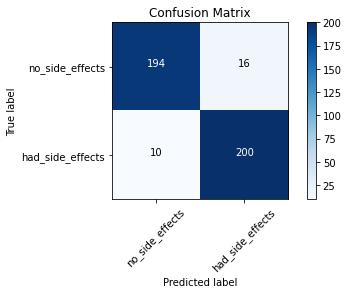

In [27]:
cm_plot_labels = ['no_side_effects', 'had_side_effects']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [28]:
import os.path
if os.path.isfile('models/medical_trial_model.h5') is False:
    model.save('models/medical_trial_model.h5')

In [30]:
from tensorflow.keras.models import load_model
new_model = load_model('models/medical_trial_model.h5')

In [31]:
new_model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [32]:
new_model.get_weights()

[array([[ 0.53171134,  0.687866  ,  0.6626342 , -0.05844194,  0.36941728,
          0.5132944 ,  0.41953576,  0.44907475, -0.16314438,  0.19021577,
         -0.251275  , -0.5643926 , -0.10413063, -0.33613583, -0.3489561 ,
          0.41557956]], dtype=float32),
 array([-0.15018232, -0.14509872, -0.15761015,  0.        , -0.1291724 ,
        -0.12482133,  0.14635126, -0.11717605,  0.        ,  0.2653129 ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.18939556], dtype=float32),
 array([[ 1.42855704e-01, -2.54712075e-01,  6.14296943e-02,
          2.31153712e-01,  2.78104872e-01,  2.15907186e-01,
         -1.09443665e-02, -3.98978025e-01,  1.40342906e-01,
          4.06856775e-01, -2.18568683e-01, -2.31927652e-02,
         -4.54489827e-01, -2.14811683e-01,  1.15291759e-01,
         -1.13614373e-01,  5.02904281e-02, -2.19250217e-01,
         -4.71662700e-01,  1.53416067e-01, -4.04949456e-01,
         -3.23581666e-01,  2.11988777e-01,  5.90717375e-01,
 

In [33]:
new_model.optimizer

In [35]:
# save as JSON
json_string = model.to_json()

# save as YAML
#yaml_string = model.to_yaml()

In [36]:
from tensorflow.keras.models import model_from_json
model_architecture = model_from_json(json_string)

In [37]:
model_architecture.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [38]:
import os.path
if os.path.isfile('models/my_model_weights.h5') is False:
    model.save_weights('models/my_model_weights.h5')

In [39]:
model2 = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])

In [40]:
model2.load_weights('models/my_model_weights.h5')

In [41]:
model2.get_weights()

[array([[ 0.53171134,  0.687866  ,  0.6626342 , -0.05844194,  0.36941728,
          0.5132944 ,  0.41953576,  0.44907475, -0.16314438,  0.19021577,
         -0.251275  , -0.5643926 , -0.10413063, -0.33613583, -0.3489561 ,
          0.41557956]], dtype=float32),
 array([-0.15018232, -0.14509872, -0.15761015,  0.        , -0.1291724 ,
        -0.12482133,  0.14635126, -0.11717605,  0.        ,  0.2653129 ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.18939556], dtype=float32),
 array([[ 1.42855704e-01, -2.54712075e-01,  6.14296943e-02,
          2.31153712e-01,  2.78104872e-01,  2.15907186e-01,
         -1.09443665e-02, -3.98978025e-01,  1.40342906e-01,
          4.06856775e-01, -2.18568683e-01, -2.31927652e-02,
         -4.54489827e-01, -2.14811683e-01,  1.15291759e-01,
         -1.13614373e-01,  5.02904281e-02, -2.19250217e-01,
         -4.71662700e-01,  1.53416067e-01, -4.04949456e-01,
         -3.23581666e-01,  2.11988777e-01,  5.90717375e-01,
 